<a href="https://colab.research.google.com/github/bonsoul/Classification-Deep-Learning/blob/main/Classification_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles


#make 10 samples
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(X[:5])

[[ 0.74220688  0.24668576]
 [-0.7340323   0.16869164]
 [-0.82985872  0.22195899]
 [-0.42913559  0.67223019]
 [ 0.44560223 -0.89493556]]


In [ ]:
print(y[:5])

[1 1 1 1 0]


In [ ]:
import pandas as pd
circles = pd.DataFrame({'X0': X[:,0],
                        'X2': X[:,1],
                        "label":y})

circles.head(10)

,X0,X2,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0
5,-0.469885,0.708037,1
6,-0.016045,0.805623,1
7,0.759623,0.159526,1
8,-0.175692,-0.799837,1
9,-0.110616,1.042207,0


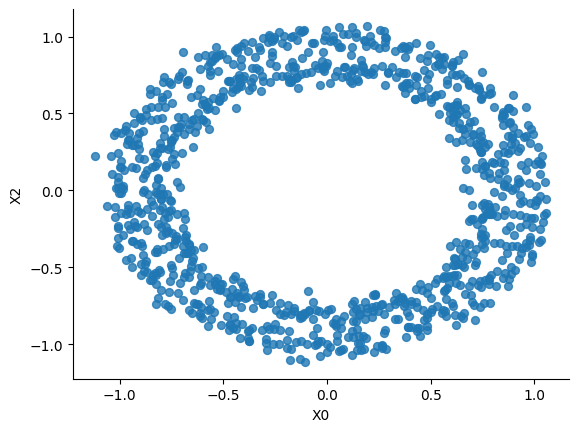

In [ ]:
# @title X0 vs X2

from matplotlib import pyplot as plt
circles.plot(kind='scatter', x='X0', y='X2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

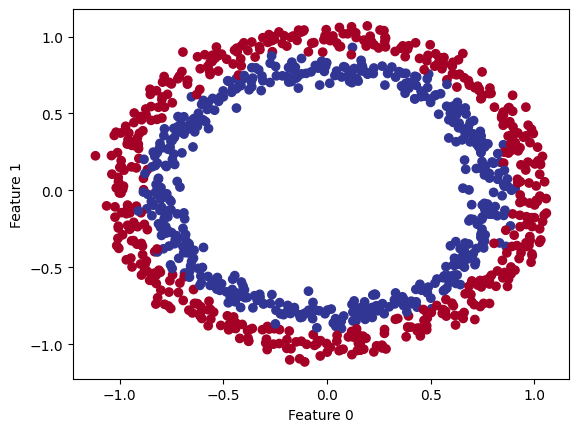

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [ ]:
# Turn Data Into Tensors

import torch
torch.__version__

'2.3.1+cu121'

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
# view the first five samples
X[:5],y[:5]

(tensor([[ 0.7422,  0.2467],
         [-0.7340,  0.1687],
         [-0.8299,  0.2220],
         [-0.4291,  0.6722],
         [ 0.4456, -0.8949]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# train test and split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building The Model

In [ ]:
import torch
from torch import nn


device = "cuda" if torch.cuda.is_available() else "cupu"
device

'cupu'

In [ ]:
# construct a model class that subclasses nn,Modele

class CircleModelV0(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.layer_1 = nn.Linear(in_features=2,out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self,X):
    return self.sigmoid(self.layer_2(self.relu(self_Layer_1(X))))

#create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [ ]:
import torch
from torch import nn


device = "cuda" if torch.cuda.is_available() else "cpu"
device

# construct a model class that subclasses nn,Modele

class CircleModelV0(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.layer_1 = nn.Linear(in_features=2,out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self,X):
    # Corrected a typo here: self_Layer_1 to self.layer_1
    return self.sigmoid(self.layer_2(self.relu(self.layer_1(X))))

#create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.ReLU(),
    nn.Linear(in_features=5, out_features=1),
    nn.Sigmoid()
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
#make predictions

untrained_preds = model_0(X_test.to(device))
untrained_preds
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels: \n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions: 
tensor([[0.4215],
        [0.4398],
        [0.3979],
        [0.4324],
        [0.4160],
        [0.4182],
        [0.4523],
        [0.4473],
        [0.3952],
        [0.4401]], grad_fn=<SliceBackward0>)

First 10 test labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
#Setup loss function and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [ ]:
#Calculate accuracy

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [ ]:
#view the first 5 outputs of the forward ass

y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.4215],
        [0.4398],
        [0.3979],
        [0.4324],
        [0.4160]], grad_fn=<SliceBackward0>)

In [ ]:
#using sigmoid on model logits

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6039],
        [0.6082],
        [0.5982],
        [0.6064],
        [0.6025]], grad_fn=<SigmoidBackward0>)

In [ ]:
#find the predicted labels

y_preds = torch.round(y_pred_probs)

# Predict on the entire test set
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))

# Compare predictions for the first 5 samples
print(torch.eq(y_preds.squeeze(), y_pred_labels[:5].squeeze()))

#get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.], grad_fn=<SqueezeBackward0>)

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
#Building a training and testing loop

torch.manual_seed(42)

epochs = 100

#put data to target device

X_train,y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device), y_test.to(device)

#Building training and evaluation loop
 for epoch in range(epochs):

     model_0.train()

  #foward pass

      y_logits = model_0(X_train).squeeze()
      y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate loss
      loss = loss_fn(y_logits, y_train)
      acc = accuracy_fn(y_true=y_train, y_pred=y_pred)


  #optimizer zero grad
      optimizer.zero_grad()

  #loss backwards
      loss.backward()

  #optimizer step
       optimizer.step()

  #testing
  model_0.eval()
  with torch.inference_mode():
       test_logits = model_0(X_test).squeeze()
       test_pred = torch.round(torch.sigmoid(test_logits))
       test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | T ")


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 37)

In [ ]:
#Building a training and testing loop

torch.manual_seed(42)

epochs = 100

#put data to target device

X_train,y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device), y_test.to(device)

#Building training and evaluation loop
for epoch in range(epochs):

    model_0.train()

    #foward pass

    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # calculate loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)


    #optimizer zero grad
    optimizer.zero_grad()

    #loss backwards
    loss.backward()

    #optimizer step
    optimizer.step()

    #testing
    model_0.eval() # Make sure this line has the same indentation as the 'model_0.train()' above
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | T ")

Epoch: 0 | Loss: 0.71472, Accuracy: 50.00% | T 
Epoch: 10 | Loss: 0.71385, Accuracy: 50.00% | T 
Epoch: 20 | Loss: 0.71303, Accuracy: 50.00% | T 
Epoch: 30 | Loss: 0.71224, Accuracy: 50.00% | T 
Epoch: 40 | Loss: 0.71148, Accuracy: 50.00% | T 
Epoch: 50 | Loss: 0.71076, Accuracy: 50.00% | T 
Epoch: 60 | Loss: 0.71008, Accuracy: 50.00% | T 
Epoch: 70 | Loss: 0.70942, Accuracy: 50.00% | T 
Epoch: 80 | Loss: 0.70879, Accuracy: 50.00% | T 
Epoch: 90 | Loss: 0.70820, Accuracy: 50.00% | T 


In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

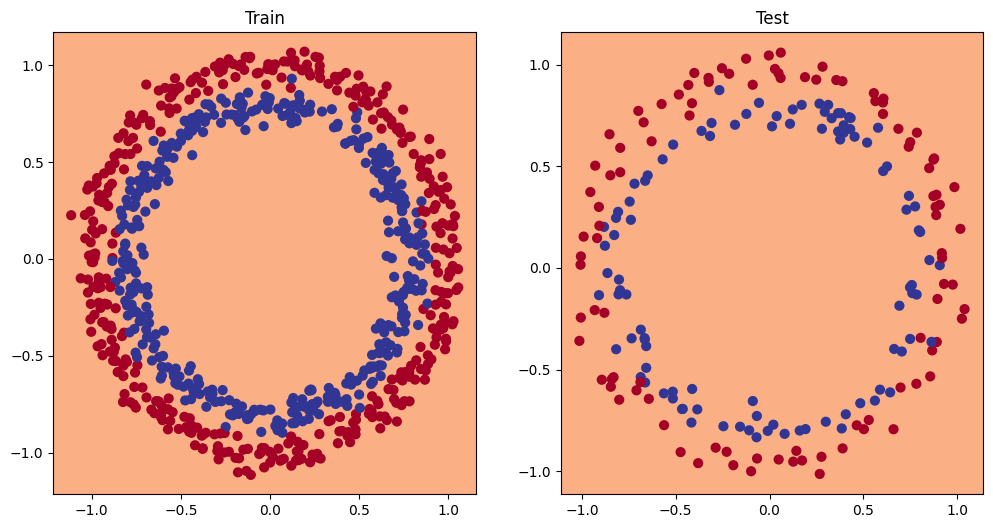

In [ ]:
# plot predictions

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)
